In [1]:
import json
import tqdm
import glob
import os

In [2]:
num=1
with open(f"Collect_{num}/face/video-6266/aliface/0-ถ้าคิดว่าไหวก็เดินเข้ามา.json") as f:
    data = json.load(f)

In [3]:
peopledata = []

peoples = []
yalls = []
patchs = []

for num in range(1,11):
    collect = f"Collect_{num}/face"
    for v in tqdm.tqdm(glob.glob(f"{collect}/*")):
        video = os.path.basename(v)
        aliface = f"{v}/aliface"
        for f in glob.glob(f"{aliface}/*"):
            with open(f, "r", encoding='utf8') as outfile:
                data = json.load(outfile)
            
            people = data["people"]
            yall = data["yall"]
            patch =data["patch"]

            peoples.extend(people)
            yalls.extend(yall)
            patchs.extend(patch)


            if set(people) == {1}:
                peopledata.append(1)
            elif set(people) == {2}:
                peopledata.append(2)
            elif set(people) == {3}:
                peopledata.append(3)
            else:
                peopledata.append(-1)

100%|██████████| 946/946 [55:23<00:00,  3.51s/it]  


In [4]:
import matplotlib.pyplot as plt
import numpy as np
unique_elements, counts = np.unique(peoples, return_counts=True)


In [29]:
counts

array([ 362643, 1313215,  267694,   93143,   42638,   15559,    9239,
          2767,     246,       9,       1], dtype=int64)

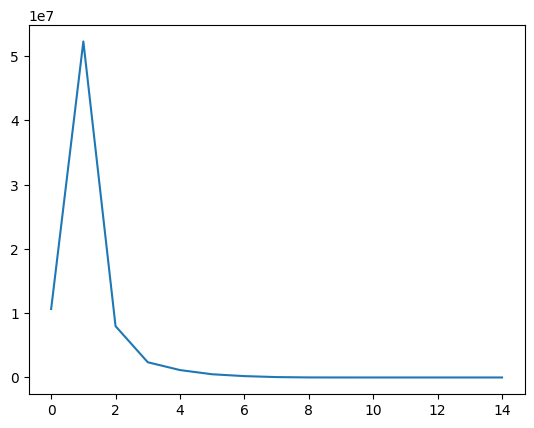

In [5]:
plt.plot(unique_elements, counts)